In [6]:
import tensorflow as tf

In [7]:
print('hello')

hello


In [8]:
 from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np

# LOADING DATASET

In [39]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [40]:
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)



shape of x_train (2000, 30000)
shape of y_train (2000,)
shape of x_test (400, 30000)
shape of y_test (400,)


In [41]:
#image_rgb=100*100*3

In [42]:
#reshaping image

In [43]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [44]:
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of x_test (400, 100, 100, 3)
shape of y_test (400, 1)


In [45]:
#normalisation


In [46]:
x_train[0,]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

In [47]:
x_train=x_train/255
x_test=x_test/255

In [48]:
x_train[1,]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [49]:
import matplotlib.pyplot as plt
import random

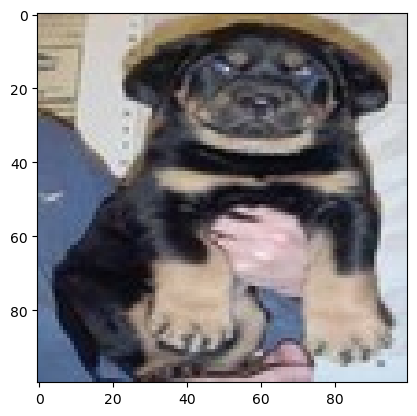

In [50]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])

In [51]:
from keras.layers import BatchNormalization

In [52]:
x_train[0].shape

(100, 100, 3)

In [53]:
len(y_train)

2000

In [54]:
from tensorflow.keras.layers import Dropout

# MODEL BUILDING

In [55]:
# dropouts in feature extraction layers tend to reduce accuracy so better avoid them
#athough use dropouts in dense layers

In [56]:
model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)),
    
    MaxPooling2D((2,2)),
    
    
    Conv2D(32,(3,3),activation='relu'),
    
    MaxPooling2D((2,2)),
    
    
    Conv2D(64,(3,3),activation='relu'),
    
    MaxPooling2D((2,2)),
    
    
    Conv2D(128,(3,3),activation='relu'),
    
    MaxPooling2D((2,2)),
    
    
    Conv2D(128,(3,3),activation='relu'),
    
    MaxPooling2D((2,2)),
    
    
    
    
    
    
   
    
    
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    
    
    Dense(1,activation='sigmoid'),
    

])

In [57]:
#adding cost fn and backpro

In [58]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 9s 287ms/step - loss: 0.4715 - accuracy: 0.7755
Epoch 2/5
32/32 [==============================] - 10s 299ms/step - loss: 0.4002 - accuracy: 0.8155
Epoch 3/5
32/32 [==============================] - 9s 291ms/step - loss: 0.3526 - accuracy: 0.8405
Epoch 4/5
32/32 [==============================] - 9s 275ms/step - loss: 0.3122 - accuracy: 0.8720
Epoch 5/5
32/32 [==============================] - 9s 273ms/step - loss: 0.2496 - accuracy: 0.8935


In [63]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 38ms/step - loss: 0.5432 - accuracy: 0.7525


[0.5432416200637817, 0.7524999976158142]

I HAVE RUN DATA FOR 3 EPOCHS 
AT 4TH EPOCH MODEL STRTS OVERFITTING

In [64]:
#"making predictions

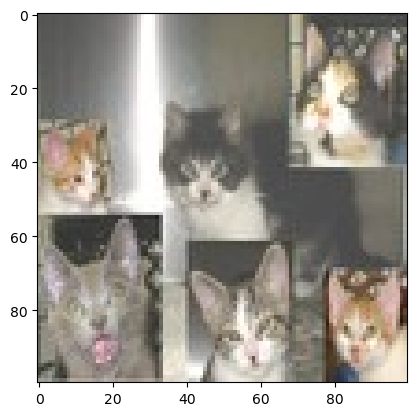

1/1 [==============================] - 0s 408ms/step
it is dog


In [65]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    print('it is dog')
else:
    print('it is a cat')

In [27]:
x_test.shape

(400, 100, 100, 3)

In [28]:
x_test[1,:].shape

(100, 100, 3)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

# convolutional autoencoder approach

In [66]:
from tensorflow.keras.layers import UpSampling2D, Input

In [122]:
x_train.shape

(2000, 100, 100, 3)

In [123]:
input_img=Input(shape=(100,100,3))

In [132]:
#encoder
def encoder(input_img):
    conv1=Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
    d1=MaxPooling2D(2,2)(conv1)
    
    conv2=Conv2D(32,(3,3),activation='relu',padding='same')(d1)
    d2=MaxPooling2D(2,2)(conv2)
    
    conv3=Conv2D(64,(3,3),activation='relu',padding='same')(d2)
    d3=MaxPooling2D(2,2)(conv3)
    
    conv4=Conv2D(128,(3,3),activation='relu',padding='same')(d3)
    d4=MaxPooling2D(2,2)(conv4)
    
    conv5=Conv2D(128,(3,3),activation='relu',padding='same')(d4)
    
    return conv5
#decoder   
def decoder(conv5):
    conv6=Conv2D(128,(3,3),activation='relu',padding='same')(conv5)
    u1=UpSampling2D(2,2)(conv5)
    
    conv7=Conv2D(64,(3,3),activation='relu',padding='same')(u1)
    u2=UpSampling2D(2,2)(conv7)
    
    decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(u2)
    
    return decoded
    
    
      

    
    
   
    
    
    
    
    

In [133]:
from keras.models import Model

In [142]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

AttributeError: 'int' object has no attribute 'lower'